<a href="https://colab.research.google.com/github/Duffany/Datacamp-project/blob/Datacamp-project/Bitcoin_investemt_base_on_sentiment%2C_NAPOLEON_GROUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

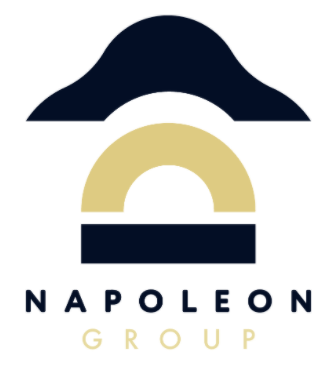

---


#**Problem description**
The problem is a classification challenge that aims at building investment strategies on cryptocurrencies based on sentiment extracted from news and social networks.

#**Data description**
The Input data contains 10 time series of 48 trading hours representing complementary features based on sentiment analysis from news extracted from twitter or forums like Bitcointalk on Bitcoin, and 5 time series based on the variation of Bitcoin price during the past 1, 6, 12, 24 and 48 hours normalised by volatility during the period. Input data, for training and testing, will be given by a .csv file, whose first line contains the header. Then each line corresponds to a sample, each column to a feature. The features are the following:


- **ID**: Id of the sample which is linked to the ID of the output file;
- **I_1_lag(k) to I_10_lag(k)**: Values of Indicators I_1 to I_10 for each k lag ($k\in[\![0;47]$) representing the normalized value of Indicators **I_1** to **I_10** each hour of the past 48 trading hours;
- **X_1 to X_5**: Values of 5 normalised indicators representing price variation of Bitcoin on the last 1, 6, 12, 24 and 48 hours.
There will be 14 000 samples for the train set and 5 000 for the test set. For a given sample, the time series (for the 10 sentiment indicators) are given over the same 48 trading hours.

The training outputs are given in a .csv file. Each line corresponds to a sample:

- **ID**: Id of the sample;
- **Target_-1**: classification of the return of Bitcoin in the next hour. -1 signifies a down move of less than -0.2%;
- **Target_0**: classification of the return of Bitcoin in the next hour. 0 signifies a move between -0.2% and 0.2%;
- **Target_1**: classification of the return of Bitcoin in the next hour. 1 signifies a up move of more than 0.2%.

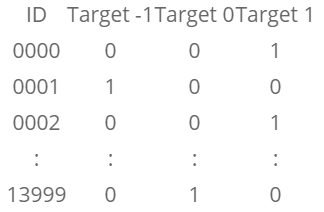



#**Data Exploration**

- **X_train, input data of the training set** : https://challengedata.ens.fr/participants/challenges/31/download/x-train
- **y_train,output data of the training set** : https://challengedata.ens.fr/participants/challenges/31/download/y-train
- **X_test,input data of the testing set** : https://challengedata.ens.fr/participants/challenges/31/download/x-test

In [2]:
!pip install nb_black 

     |████████████████████████████████| 1.1MB 6.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 747kB 18.4MB/s 
     |████████████████████████████████| 727kB 29.3MB/s 
  Created wheel for black: filename=black-20.8b1-cp36-none-any.whl size=124185 sha256=3fc43b936d37c1778c11c28d3321f27d3178b883126604a9c6b9ee66cad4f2ca
  Stored in directory: /root/.cache/pip/wheels/6e/10/b5/edf7359c2edd0305cce7e3f96e07daf7ce55dceac9d3ce3373
Successfully built black
  Created wheel for nb-black: filename=nb_black-1.0.7-cp36-none-any.whl size=5284 sha256=5c4d57d377dd659eccb34bb576e54bab3b3df3097bab6057997c9eaede195a4f
  Stored in directory: /root/.cache/pip/wheels/35/6d/99/856a3401e3a2153f51223f1be990e4b30f80f9e4bd1604ae9b
Successfully built nb-black
  Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
X_train = pd.read_csv('/content/input_training_IrTAw7w.csv')
y_train = pd.read_csv('/content/output_training_F2dZW38.csv')
X_test = pd.read_csv('/content/input_test_PkjtqdQ.csv')

In [3]:
X_train.head()

,ID,X1,X2,X3,X4,X5,I1_lag0,I1_lag1,I1_lag2,I1_lag3,I1_lag4,I1_lag5,I1_lag6,I1_lag7,I1_lag8,I1_lag9,I1_lag10,I1_lag11,I1_lag12,I1_lag13,I1_lag14,I1_lag15,I1_lag16,I1_lag17,I1_lag18,I1_lag19,I1_lag20,I1_lag21,I1_lag22,I1_lag23,I1_lag24,I1_lag25,I1_lag26,I1_lag27,I1_lag28,I1_lag29,I1_lag30,I1_lag31,I1_lag32,I1_lag33,...,I10_lag8,I10_lag9,I10_lag10,I10_lag11,I10_lag12,I10_lag13,I10_lag14,I10_lag15,I10_lag16,I10_lag17,I10_lag18,I10_lag19,I10_lag20,I10_lag21,I10_lag22,I10_lag23,I10_lag24,I10_lag25,I10_lag26,I10_lag27,I10_lag28,I10_lag29,I10_lag30,I10_lag31,I10_lag32,I10_lag33,I10_lag34,I10_lag35,I10_lag36,I10_lag37,I10_lag38,I10_lag39,I10_lag40,I10_lag41,I10_lag42,I10_lag43,I10_lag44,I10_lag45,I10_lag46,I10_lag47
0,0,0.460020,0.620360,-0.972192,2.745197,4.177783,2.325865,2.060138,0.071162,2.360597,-0.611526,-0.474029,1.380300,0.160847,1.101279,-1.064275,0.247346,-1.570320,0.490027,-0.621964,-1.221890,-0.732714,-0.078984,0.061406,0.221455,-0.355269,0.078437,0.976421,0.071217,-0.303876,1.760369,0.209699,1.055768,1.551331,-0.377121,-0.703104,-1.078121,-1.084246,0.907088,0.251208,...,-0.637173,-0.513893,0.015092,-0.429889,-0.462246,-0.605788,-0.065968,-0.310555,-0.427917,0.017064,0.268322,-0.135628,0.164521,1.230382,0.475606,1.819093,1.457144,0.272268,0.342204,-0.063995,-0.179603,-0.605788,-0.256935,-0.194165,-0.309554,-0.322650,-0.530428,-0.474835,-0.681148,-0.311526,-0.342912,-0.194165,0.122331,0.028682,-0.093626,-0.559840,0.562584,-0.557868,1.424906,-0.016294
1,1,-0.347872,-2.199925,-0.222026,3.741888,8.608291,-4.091293,-3.502499,-1.463631,0.383153,-3.669962,-2.118337,-0.933734,0.279289,-2.170922,-0.578250,1.221512,1.469743,2.237671,1.145432,3.997874,0.425221,-1.448649,-1.544079,-1.697530,-2.300471,-0.326959,-2.621576,-1.438986,-3.016570,-3.307165,-1.890347,-1.933800,-2.355512,-1.368035,3.060146,2.400343,-0.887212,-0.574003,3.272423,...,1.519025,-0.100023,1.318612,-1.769285,-0.099151,-0.742011,-0.764704,3.114075,-0.768659,-1.888611,-4.173557,-1.500642,-1.281869,-0.307040,0.484154,0.513884,-1.375002,0.700223,2.471160,-0.529024,-3.761279,-1.292754,2.304832,1.712529,1.879730,2.607232,4.955086,3.848342,3.056587,0.446149,1.261341,-0.082428,-1.035813,-0.249607,-0.971215,-0.058408,1.460632,-0.653394,-1.743487,4.065305
2,2,-2.152963,-0.432461,1.619057,-0.003912,3.870262,-0.598858,-0.412391,-0.765354,-0.998152,-0.938755,-0.890084,-0.435971,-0.589324,-1.261406,-1.702031,-0.749754,-0.935591,-0.539690,-0.281132,-0.106126,-0.131812,1.365607,-0.247970,-0.618311,0.455266,-0.493096,0.019743,1.187119,2.071983,-0.242272,0.949171,0.478886,-0.528869,-0.723906,-0.486781,-0.552184,-0.777914,0.479526,-0.247711,...,-0.831661,-1.022850,-1.036608,-0.844501,-0.474288,-1.024714,-0.910107,-0.615287,-0.147307,-0.702378,-0.778221,0.429250,-0.189770,0.168520,0.351721,0.702135,-0.492046,0.513999,-0.262831,0.355271,-0.377906,-0.099897,-0.106679,-0.430878,-0.735757,-0.186989,-0.117655,-0.939759,0.238060,-0.352254,2.245204,3.002347,2.674186,2.656251,1.062974,-0.484619,-0.044594,1.579731,0.962836,1.146983
3,3,-1.827669,-1.881770,-4.214322,0.178225,0.992362,0.383757,2.512478,-0.383434,-0.208506,-1.104289,-1.055666,-1.792361,-1.313026,-1.183724,-2.461788,-1.905122,-2.562135,-1.307096,-0.598499,-2.498382,-3.018896,-2.769343,0.975802,1.980034,1.178934,1.533094,0.321730,0.999047,3.888724,3.225654,1.950678,2.240602,1.731966,1.678903,0.843741,-1.604130,0.207124,0.554533,-0.589924,...,-2.773947,-2.241666,-0.501592,-3.224021,-0.692138,-1.462365,-1.964202,-0.243791,-1.411816,-1.045186,0.742529,1.240860,-0.149391,-0.430394,4.077533,2.034854,-0.604751,3.734104,0.801305,1.352424,-1.391221,-0.497520,-0.236622,-1.053379,0.706517,-1.464426,0.517342,-1.106200,-0.248532,-1.879933,1.383203,-1.338892,0.298076,1.808275,2.837975,2.054112,0.741138,1.701911,0.110082,0.114980
4,4,0.748761,1.799939,1.561006,5.204120,2.161637,-1.275226,-1.544131,-1.802590,-1.128526,-0.469835,-1.033174,-1.132530,0.673757,-0.899913,-0.816432,-1.440545,-1.497806,-1.138407,-0.183933,-0.660791,-0.711956,0.714628,4.871

In [ ]:
X_test.head()

,ID,X1,X2,X3,X4,X5,I1_lag0,I1_lag1,I1_lag2,I1_lag3,I1_lag4,I1_lag5,I1_lag6,I1_lag7,I1_lag8,I1_lag9,I1_lag10,I1_lag11,I1_lag12,I1_lag13,I1_lag14,I1_lag15,I1_lag16,I1_lag17,I1_lag18,I1_lag19,I1_lag20,I1_lag21,I1_lag22,I1_lag23,I1_lag24,I1_lag25,I1_lag26,I1_lag27,I1_lag28,I1_lag29,I1_lag30,I1_lag31,I1_lag32,I1_lag33,...,I10_lag8,I10_lag9,I10_lag10,I10_lag11,I10_lag12,I10_lag13,I10_lag14,I10_lag15,I10_lag16,I10_lag17,I10_lag18,I10_lag19,I10_lag20,I10_lag21,I10_lag22,I10_lag23,I10_lag24,I10_lag25,I10_lag26,I10_lag27,I10_lag28,I10_lag29,I10_lag30,I10_lag31,I10_lag32,I10_lag33,I10_lag34,I10_lag35,I10_lag36,I10_lag37,I10_lag38,I10_lag39,I10_lag40,I10_lag41,I10_lag42,I10_lag43,I10_lag44,I10_lag45,I10_lag46,I10_lag47
0,0,-0.520300,-0.853221,-2.296800,-0.055880,-1.469225,-1.700494,-0.319040,-1.310092,-1.378938,0.082352,-0.885750,0.560180,1.268409,0.182536,2.117298,0.317063,1.434532,1.500939,5.908881,3.252609,-0.360005,-0.853103,-1.256648,1.151565,-0.397299,-1.222250,-0.875198,-1.079020,-1.568038,-1.823290,-1.891305,-0.426954,-0.986216,-0.090129,-0.370341,-0.476391,0.248826,-0.677917,1.050589,...,1.859024,0.052084,-0.328592,1.628057,0.933879,1.269238,-0.361196,-1.155150,0.868990,-1.318532,-0.649653,0.665035,0.122952,-0.557180,-0.495297,1.016430,-1.085590,-1.056309,0.065716,-0.698292,-0.359887,0.790110,-0.160857,0.036436,0.184170,0.016823,-0.638399,0.513962,-0.061097,2.103195,1.639993,-0.848683,0.502320,-1.200078,-0.521920,0.249765,-0.416457,-0.583804,-0.241393,-1.595053
1,1,0.525097,1.523570,6.114524,9.567265,14.081102,0.316957,0.389311,0.433815,0.814357,-0.387168,-0.741655,-0.562897,-0.590461,-0.684134,-0.871275,-1.644541,0.168954,-0.152758,-0.909248,-0.982662,-0.483286,-0.385455,0.502885,0.306805,-0.018507,2.571901,2.034963,1.690779,-0.382767,0.314883,1.126441,-0.338911,-0.213077,0.464751,-0.788728,-0.719977,-1.401740,-0.574238,-1.230802,...,0.110114,-0.157748,-0.090929,-0.854986,-0.231479,1.706476,0.113684,0.322831,-0.603607,0.391428,0.396213,0.500480,0.192200,0.891831,0.326774,-0.565545,-0.382162,0.325824,-0.297683,-0.108938,-0.707873,-0.152963,-1.213024,-0.466027,-0.241962,-0.707873,-1.121633,-0.645239,-1.012582,-0.551455,-0.268363,-0.850201,-0.151785,1.163263,-0.404342,0.246708,-0.036999,-0.008242,1.820997,-0.355798
2,2,-0.128521,-1.167346,0.701038,-1.974252,-3.281905,-0.739390,-0.677568,-1.290621,-0.546517,-1.136910,-0.811886,-0.620070,-0.916593,-0.555214,2.380243,1.298938,0.122205,0.109000,-0.118925,0.185452,0.529038,0.204153,0.143802,0.260167,-0.893259,0.295669,-0.746000,-1.179210,0.098919,1.595424,-0.497514,1.197383,-0.362633,-0.708541,-0.940352,-0.315436,-0.696748,-0.631939,-0.311877,...,-0.386146,-0.079066,-0.710205,0.047390,1.473863,-0.226567,0.479647,0.171901,0.203095,2.187328,-0.173910,0.693200,-0.440121,-0.171314,-0.398834,-1.002040,-0.199913,0.331479,-0.456682,-0.044208,-0.600977,0.454674,-0.495374,0.407206,0.524846,0.091272,0.062673,-0.016927,0.546310,0.567411,0.541407,0.792986,-0.376052,-0.096905,-0.339669,-0.550627,-0.110871,0.375361,0.881361,0.379234
3,3,0.759396,3.288058,1.255716,7.660671,12.533418,0.490267,0.020468,0.254029,0.753452,-0.587062,-0.421100,-0.508537,1.562144,-1.105099,1.268938,-1.081611,0.101396,0.304521,-0.828912,-0.822739,-1.159261,-1.272419,-0.747450,-0.874726,-1.142307,0.459906,-1.054077,2.861875,-0.323872,-0.387836,0.658144,-0.566547,3.184986,3.493197,1.352139,-0.088000,0.558865,0.344420,-0.802437,...,-0.311393,-0.586336,-0.361328,-0.534573,0.158240,-0.876982,-0.712745,-0.418215,0.194013,-0.418215,-0.313449,-0.429806,0.630125,0.668254,1.071661,0.171359,0.054486,2.160205,-0.024043,0.021781,1.121596,1.250545,0.475939,0.030819,-0.191152,-0.716856,-0.716856,-0.668977,-0.140401,-0.559283,-0.625208,-0.467107,-0.841209,-0.408164,0.085135,-0.625208,0.789239,0.673697,0.000667,1.287649
4,4,-0.258911,-1.028298,-1.275208,3.812080,10.039022,-1.592923,0.413349,-1.721753,-1.827165,0.154969,-1.518128,-0.241237,-0.513408,-0.632841,-1.160545,-0.365545,-0.140075,-1.129210,-0.826867,0.395707,0.485386,-0.881052,2.48460

In [ ]:
y_train.head()

,ID,Target -1,Target 0,Target 1
0,0,0,0,1
1,1,1,0,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


Let's perform the reverse one hot encoding on the targets to get one target or columns.

In [ ]:
def label(row):
   if row['Target -1'] == 1 :
      return 0
   if row['Target 0'] == 1 :
      return 1
   if row['Target 1'] == 1 :
      return 2

In [4]:
def label(row):
   if row['Target -1'] == 1 :
      return 'less'
   if row['Target 0'] == 1 :
      return 'between'
   if row['Target 1'] == 1 :
      return 'more'

In [5]:
data = X_train
data['Target'] =  y_train.apply (lambda row: label(row), axis=1)

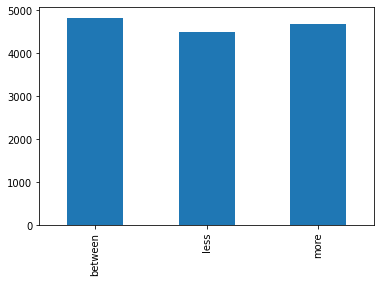

In [ ]:
data['Target'].value_counts().sort_index().plot.bar(x='labels', y='Number of Occurrences')


#### **Logistic Regression Benchmark**

In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
X_train = pd.read_csv('/content/input_training_IrTAw7w.csv')
y_train = pd.read_csv('/content/output_training_F2dZW38.csv')
X_test = pd.read_csv('/content/input_test_PkjtqdQ.csv')

In [8]:
X = X_train[['X1','X2','X3','X4','X5']]
y = y_train.drop('ID',axis=1)

In [ ]:
X.shape, y.shape

((14000, 5), (14000, 3))

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((11200, 5), (11200, 3))

In [ ]:
X_val.shape, y_val.shape

((2800, 5), (2800, 3))

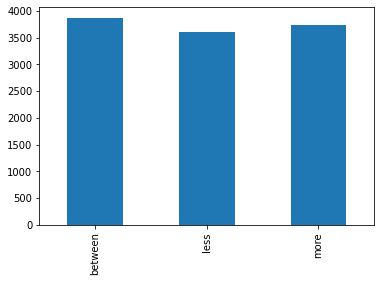

In [ ]:
y_train_balanced =  y_train.apply (lambda row: label(row), axis=1)
y_train_balanced.value_counts().sort_index().plot.bar(x='labels', y='Number of Occurrences')

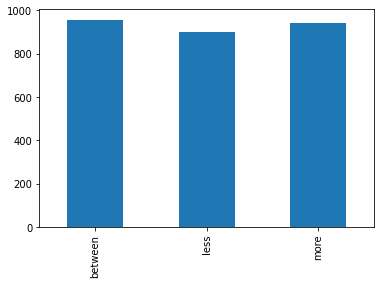

In [ ]:
y_val_balanced =  y_val.apply (lambda row: label(row), axis=1)
y_val_balanced.value_counts().sort_index().plot.bar(x='labels', y='Number of Occurrences')

In [11]:
y_train_new = y_train 
y_val_new = y_val
y_train_new['Target'] = y_train.apply (lambda row: label(row), axis=1)
y_val_new['Target'] =  y_val.apply (lambda row: label(row), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
y_val_new

,Target -1,Target 0,Target 1,Target
2900,0,1,0,between
3143,0,1,0,between
8231,0,0,1,more
3855,0,1,0,between
8045,0,0,1,more
...,...,...,...,...
5130,1,0,0,less
9657,0,1,0,between
11668,1,0,0,less
12065,0,0,1,more


In [13]:
y_train_new = y_train_new[['Target']]
y_val_new = y_val_new[['Target']]


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics as metrics


# Using pipeline for applying logistic regression and one vs rest classifier
model = Pipeline([ ('clf', MultiOutputClassifier(LogisticRegression(solver='lbfgs'), n_jobs=-1)), ])

model.fit(X_train, y_train_new)


Pipeline(memory=None,
         steps=[('clf',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1.0,
                                                                    class_weight=None,
                                                                    dual=False,
                                                                    fit_intercept=True,
                                                                    intercept_scaling=1,
                                                                    l1_ratio=None,
                                                                    max_iter=100,
                                                                    multi_class='auto',
                                                                    n_jobs=None,
                                                                    penalty='l2',
                                                                    random_state=None,
                                

In [17]:
# Predict classes given the validation features
y_pred = model.predict(X_val)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_val_new, y_pred)
print("LR Accuracy: ", accuracy)

# Predict probabilities of classes
y_pred_probas = model.predict_proba(X_val)

# Calculate the logistic loss
log_loss = metrics.log_loss(y_val_new,y_pred_probas)
print("LR Log_loss: ", log_loss)

LR Accuracy:  0.36964285714285716


ValueError: ignored

In [ ]:
#prediction on test


# **First Approch**

In [24]:
X_train = X_train.drop(['ID','Target'], axis=1)
X_test = X_test.drop('ID', axis=1)
y_train = y_train.drop('ID', axis=1)
data = data.drop('ID',axis = 1)

data.shape, X_train.shape

KeyError: ignored

In [ ]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(data, 'Target', val_percent=0.25)

In [ ]:
train = data[data.index.isin(train_idxs)]
X_train1 = train.drop(['Target'],axis=1).values
y_train1 = train[['Target']].values
print('Retrieved Training Data')

validation = data[data.index.isin(val_idxs)]
X_val1 = validation.drop(['Target'],axis=1).values
y_val1 = validation[['Target']].values
print('Retrieved Validation Data')

Retrieved Training Data
Retrieved Validation Data


In [ ]:
X_train1.shape, y_train1.shape

((10502, 485), (10502, 1))

In [ ]:
X_val1.shape,y_val1.shape

((3498, 485), (3498, 1))

In [ ]:
# balanced validation set 
ff = pd.DataFrame(y_val1,columns=['Target'])
ff.Target.value_counts()

1    1206
2    1169
0    1123
Name: Target, dtype: int64

#**Modeling**


#### **Random Forest**

In [ ]:
model = RandomForestClassifier(random_state=7, n_estimators=100)
model.fit(X_train1, y_train1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
# Predict classes given the validation features
y_pred = model.predict(X_val1)
# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_val1, y_pred)
print("Random Forest Accuracy: ", accuracy)

#hh
accuracy = metrics.accuracy_score(y_val1, y_pred)
print("Random Forest Accuracy: ", accuracy)
# Predict probabilities of classes
y_pred_probas = model.predict_proba(X_val1)

# Calculate the logistic loss
log_loss = metrics.log_loss(y_val1,y_pred_probas)
print("Random Forest Log_loss: ", log_loss)

Random Forest Accuracy:  0.411663807890223
Random Forest Log_loss:  1.06149171747682


**KNN** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train1,y_train1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Predict classes given the validation features
y_pred = model.predict(X_val1)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_val1, y_pred)
print("KNN Accuracy: ", accuracy)

# Predict probabilities of classes
y_pred_probas = model.predict_proba(X_val1)

# Calculate the logistic loss
log_loss = metrics.log_loss(y_val1,y_pred_probas)
print("KNN Log_loss: ", log_loss)

KNN Accuracy:  0.3865065751858205
KNN Log_loss:  6.041608558995127


In [ ]:
confusion = metrics.confusion_matrix(y_val1, y_pred)
print(f"Confusion matrix:\n{confusion}")


# Normalizing by the true label counts to get rates
print(f"\nNormalized confusion matrix:")
for row in confusion:
    print(row / row.sum())

Confusion matrix:
[[880 190 136]
 [686 257 180]
 [662 292 215]]

Normalized confusion matrix:
[0.72968491 0.15754561 0.11276949]
[0.61086376 0.22885129 0.16028495]
[0.56629598 0.24978614 0.18391788]


In [ ]:
print(metrics.classification_report(y_val1, y_pred, target_names=['less','between','more']))

              precision    recall  f1-score   support

        less       0.39      0.73      0.51      1206
     between       0.35      0.23      0.28      1123
        more       0.40      0.18      0.25      1169

    accuracy                           0.39      3498
   macro avg       0.38      0.38      0.35      3498
weighted avg       0.38      0.39      0.35      3498



**Multilayer Perceptron (MLP)** 





In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
model.fit(X_train1,y_train1)

In [ ]:
# Predict classes given the validation features
y_pred = model.predict(X_val1)

# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_val1, y_pred)
print("MLP Accuracy: ", accuracy)

# Predict probabilities of classes
y_pred_probas = model.predict_proba(X_val1)

# Calculate the logistic loss
log_loss = metrics.log_loss(y_val1,y_pred_probas)
print("MLP Log_loss: ", log_loss)

MLP Accuracy:  0.37707261292166955
MLP Log_loss:  5.335812359372145


#### **LSTM**

In [ ]:
%matplotlib inline


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler

from multiprocessing import cpu_count
from pathlib import Path

seed = 1
np.random.seed(seed)
torch.cuda.set_device(0)

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train = pd.read_csv('/content/input_training_IrTAw7w.csv')
y_train = pd.read_csv('/content/output_training_F2dZW38.csv')
X_test = pd.read_csv('/content/input_test_PkjtqdQ.csv')

In [ ]:
def label(row):
   if row['Target -1'] == 1 :
      return 0
   if row['Target 0'] == 1 :
      return 1
   if row['Target 1'] == 1 :
      return 2

In [ ]:
y_train['Target'] =  y_train.apply (lambda row: label(row), axis=1)

In [ ]:
y_train = y_train.drop('Target -1',axis=1)
y_train = y_train.drop('Target 0',axis=1)
y_train = y_train.drop('Target 1',axis=1)

y_train

,ID,Target
0,0,2
1,1,0
2,2,2
3,3,0
4,4,1
...,...,...
13995,13995,2
13996,13996,1
13997,13997,1
13998,13998,2


In [ ]:
x_trn = X_train
x_tst = X_test
y_trn = y_train

In [ ]:
def create_datasets(X, y, test_size=0.2, dropcols='ID', time_dim_first=False):
    enc = LabelEncoder()
    y_enc = enc.fit_transform(y)
    X_grouped = create_grouped_array(X)
    if time_dim_first:
        X_grouped = X_grouped.transpose(0, 2, 1)
    X_train, X_valid, y_train, y_valid = train_test_split(X_grouped, y_enc, test_size=0.1)
    X_train, X_valid = [torch.tensor(arr, dtype=torch.float32) for arr in (X_train, X_valid)]
    y_train, y_valid = [torch.tensor(arr, dtype=torch.long) for arr in (y_train, y_valid)]
    train_ds = TensorDataset(X_train, y_train)
    valid_ds = TensorDataset(X_valid, y_valid)
    return train_ds, valid_ds, enc

def create_grouped_array(data, group_col='ID', drop_cols='ID'):
    X_grouped = np.row_stack([
        group.drop(columns=drop_cols).values[None]
        for _, group in data.groupby(group_col)])
    return X_grouped

def create_test_dataset(X, drop_cols='ID'):
    X_grouped = np.row_stack([
        group.drop(columns=drop_cols).values[None]
        for _, group in X.groupby('ID')])
    X_grouped = torch.tensor(X_grouped.transpose(0, 2, 1)).float()
    y_fake = torch.tensor([0] * len(X_grouped)).long()
    return TensorDataset(X_grouped, y_fake)

def create_loaders(train_ds, valid_ds, bs=512, jobs=0):
    train_dl = DataLoader(train_ds, bs, shuffle=True, num_workers=jobs)
    valid_dl = DataLoader(valid_ds, bs, shuffle=False, num_workers=jobs)
    return train_dl, valid_dl

In [ ]:
class CyclicLR(_LRScheduler):
    
    def __init__(self, optimizer, schedule, last_epoch=-1):
        assert callable(schedule)
        self.schedule = schedule
        super().__init__(optimizer, last_epoch)

    def get_lr(self):
        return [self.schedule(self.last_epoch, lr) for lr in self.base_lrs]

In [ ]:
def cosine(t_max, eta_min=0):
    
    def scheduler(epoch, base_lr):
        t = epoch % t_max
        return eta_min + (base_lr - eta_min)*(1 + np.cos(np.pi*t/t_max))/2
    
    return scheduler

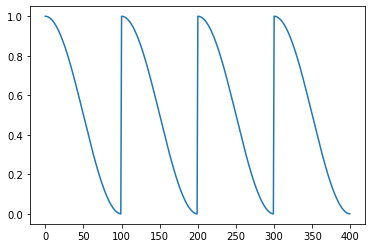

In [ ]:
n = 100
sched = cosine(n)
lrs = [sched(t, 1) for t in range(n * 4)]
plt.plot(lrs)

In [ ]:
class LSTMClassifier(nn.Module):
    """Very simple implementation of LSTM-based time-series classifier."""
    
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.batch_size = None
        self.hidden = None
    
    def forward(self, x):
        h0, c0 = self.init_hidden(x)
        out, (hn, cn) = self.rnn(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
    def init_hidden(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)
        return [t.cuda() for t in (h0, c0)]

In [ ]:
print('Preparing datasets')
trn_ds, val_ds, enc = create_datasets(x_trn, y_trn['Target'])

Preparing datasets


In [ ]:
bs = 128
print(f'Creating data loaders with batch size: {bs}')
trn_dl, val_dl = create_loaders(trn_ds, val_ds, bs, jobs=cpu_count())

Creating data loaders with batch size: 128


In [ ]:
input_dim = 485   
hidden_dim = 256
layer_dim = 3
output_dim = 3
seq_dim = 128

lr = 0.0005
n_epochs = 50
iterations_per_epoch = len(trn_dl)
best_acc = 0
patience, trials = 100, 0

model = LSTMClassifier(input_dim, hidden_dim, layer_dim, output_dim)
model = model.cuda()
criterion = nn.CrossEntropyLoss()
opt = torch.optim.RMSprop(model.parameters(), lr=lr)
sched = CyclicLR(opt, cosine(t_max=iterations_per_epoch * 2, eta_min=lr/100))

print('Start model training')
train_loss_history = []
val_loss_history = []
for epoch in range(1, n_epochs + 1):
    
    for i, (x_batch, y_batch) in enumerate(trn_dl):
        model.train()
        x_batch = x_batch.cuda()
        y_batch = y_batch.cuda()
        sched.step()
        opt.zero_grad()
        out = model(x_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        opt.step()
    
    model.eval()
    correct, total = 0, 0
    for x_val, y_val in val_dl:
        x_val, y_val = [t.cuda() for t in (x_val, y_val)]
        out = model(x_val)
        preds = F.log_softmax(out, dim=1).argmax(dim=1)
        total += y_val.size(0)
        correct += (preds == y_val).sum().item()
    
    acc = correct / total

    if epoch % 5 == 0:
        print(f'Epoch: {epoch:3d}. Loss: {loss.item():.4f}. Acc.: {acc:2.2%}')

    if acc > best_acc:
        trials = 0
        best_acc = acc
        torch.save(model.state_dict(), 'best.pth')
        print(f'Epoch {epoch} best model saved with accuracy: {best_acc:2.2%}')
    else:
        trials += 1
        if trials >= patience:
            print(f'Early stopping on epoch {epoch}')
            break

Start model training


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch 1 best model saved with accuracy: 41.57%
Epoch 2 best model saved with accuracy: 42.93%
Epoch:   5. Loss: 0.7475. Acc.: 40.43%
Epoch:  10. Loss: 0.1320. Acc.: 37.36%
Epoch:  15. Loss: 0.0718. Acc.: 39.50%
Epoch:  20. Loss: 0.0107. Acc.: 39.07%
Epoch:  25. Loss: 0.0642. Acc.: 38.07%
Epoch:  30. Loss: 0.0002. Acc.: 38.64%
Epoch:  35. Loss: 0.0000. Acc.: 39.14%
Epoch:  40. Loss: 0.0000. Acc.: 39.00%
Epoch:  45. Loss: 0.0000. Acc.: 39.00%
Epoch:  50. Loss: 0.0000. Acc.: 38.64%


In [ ]:
model.load_state_dict(torch.load('best.pth'))
model.eval()


LSTMClassifier(
  (rnn): LSTM(485, 256, num_layers=3, batch_first=True)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)

In [ ]:
test_dl = DataLoader(create_test_dataset(x_tst), batch_size=64, shuffle=False)


In [ ]:
test = []
print('Predicting on test dataset')
for batch, _ in test_dl:
    batch = batch.permute(0, 2, 1)
    out = model(batch.cuda())
    y_hat = F.log_softmax(out, dim=1).argmax(dim=1)
    test += y_hat.tolist()

Predicting on test dataset


In [ ]:
y_train

,ID,Target
0,0,2
1,1,0
2,2,2
3,3,0
4,4,1
...,...,...
13995,13995,2
13996,13996,1
13997,13997,1
13998,13998,2


In [ ]:
final = pd.get_dummies(test)
final

,0,1,2
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4995,1,0,0
4996,0,0,1
4997,0,1,0
4998,0,1,0


In [ ]:
final['ID'] = X_test.index
final

,0,1,2,ID
0,0,1,0,0
1,0,1,0,1
2,0,1,0,2
3,0,1,0,3
4,0,1,0,4
...,...,...,...,...
4995,1,0,0,4995
4996,0,0,1,4996
4997,0,1,0,4997
4998,0,1,0,4998


In [ ]:
final = final[['ID',0,1,2]]
final

,ID,0,1,2
0,0,0,1,0
1,1,0,1,0
2,2,0,1,0
3,3,0,1,0
4,4,0,1,0
...,...,...,...,...
4995,4995,1,0,0
4996,4996,0,0,1
4997,4997,0,1,0
4998,4998,0,1,0


In [ ]:
final.columns = ['ID','Target -1', 'Target 0', 'Target 1']
final

,ID,Target -1,Target 0,Target 1
0,0,0,1,0
1,1,0,1,0
2,2,0,1,0
3,3,0,1,0
4,4,0,1,0
...,...,...,...,...
4995,4995,1,0,0
4996,4996,0,0,1
4997,4997,0,1,0
4998,4998,0,1,0


In [ ]:
final.to_csv('final.csv',index=False)
from google.colab import files

files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Final training**

In [ ]:
x_test = X_test[['X1','X2','X3','X4','X5']]
pred = model.predict(x_test)
pred

array(['more', 'between', 'between', ..., 'between', 'more', 'more'],
      dtype='<U7')

In [25]:
final = pd.get_dummies(pred)
final

NameError: ignored

In [ ]:
final['ID'] = X_test.index

In [ ]:
final = final[['ID','less','between','more']]
final

,ID,less,between,more
0,0,0,0,1
1,1,0,1,0
2,2,0,1,0
3,3,1,0,0
4,4,0,0,1
...,...,...,...,...
4995,4995,0,0,1
4996,4996,1,0,0
4997,4997,0,1,0
4998,4998,0,0,1


In [ ]:
final.columns = ['ID','Target -1', 'Target 0', 'Target 1']
final

,ID,Target -1,Target 0,Target 1
0,0,0,0,1
1,1,0,1,0
2,2,0,1,0
3,3,1,0,0
4,4,0,0,1
...,...,...,...,...
4995,4995,0,0,1
4996,4996,1,0,0
4997,4997,0,1,0
4998,4998,0,0,1


In [ ]:
final.to_csv('final.csv',index=False)
from google.colab import files

files.download('final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Seconde Approch**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train = pd.read_csv('/content/input_training_IrTAw7w.csv')
y_train = pd.read_csv('/content/output_training_F2dZW38.csv')
X_test = pd.read_csv('/content/input_test_PkjtqdQ.csv')